In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Task 1. Affine transformation

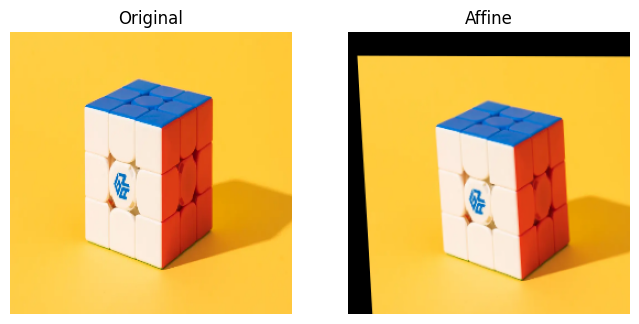

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\alias\Downloads\rubikscube-2048px-08408.webp")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

src = np.float32([[30, 30], [200, 40], [40, 210]])
dst = np.float32([[40, 50], [210, 60], [60, 220]])

M = cv2.getAffineTransform(src, dst)
affine_img = cv2.warpAffine(img, M, (256, 256))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(affine_img); plt.title("Affine"); plt.axis("off")
plt.show()


Task 2. Affine matrix & point check

Affine matrix M:
 [[9.96721311e-01 5.57377049e-02 8.42622951e+00]
 [3.27868852e-03 9.44262295e-01 2.15737705e+01]]
Original points:
 [[ 30.  30.]
 [128. 128.]
 [220. 180.]]
Transformed points:
 [[ 40.       50.     ]
 [143.14098 142.85901]
 [237.7377  192.2623 ]]


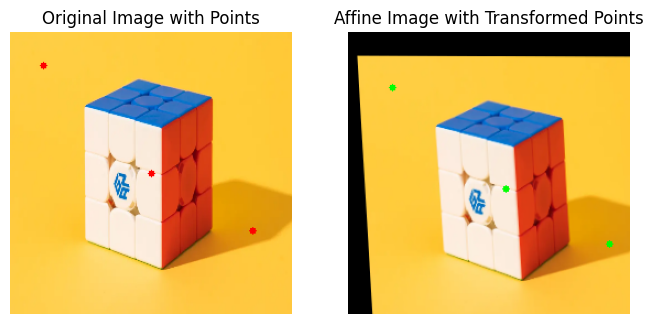

In [5]:
print("Affine matrix M:\n", M)

points = np.float32([[30, 30], [128, 128], [220, 180]])
points = points.reshape(-1, 1, 2)

transformed = cv2.transform(points, M)

print("Original points:\n", points.squeeze())
print("Transformed points:\n", transformed.squeeze())

for p in points:
    cv2.circle(img, tuple(p[0].astype(int)), 3, (255,0,0), -1)

for p in transformed:
    cv2.circle(affine_img, tuple(p[0].astype(int)), 3, (0,255,0), -1)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image with Points")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(affine_img)
plt.title("Affine Image with Transformed Points")
plt.axis('off')

plt.show()



Task 3. Nonlinear transform (remap)

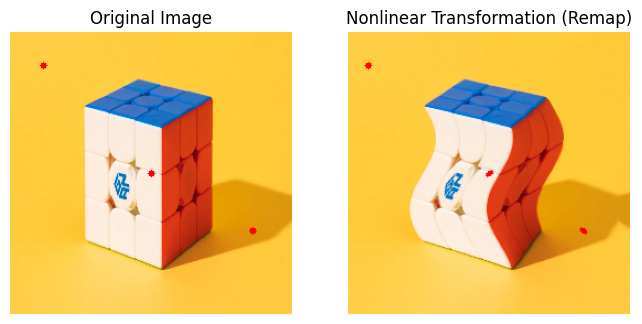

In [ ]:
h, w = 256, 256
A = 12
f = 2

map_x = np.zeros((h, w), np.float32)
map_y = np.zeros((h, w), np.float32)

for y in range(h):
    for x in range(w):
        map_x[y, x] = x + A * np.sin(2 * np.pi * f * y / w)
        map_y[y, x] = y

nonlinear = cv2.remap(
    img, map_x, map_y,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_REFLECT
)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(nonlinear)
plt.title("Nonlinear Transformation (Remap)")
plt.axis('off')

plt.show()


Task 4. Pixel value check

In [ ]:
print("Original pixel:", img[160, 70])
print("Nonlinear pixel:", nonlinear[160, 70])

Original pixel: [254 237 224]
Nonlinear pixel: [253 237 222]


Task 5. Blur convolution

[[240 239 239 238 239]
 [240 239 238 239 238]
 [240 239 239 238 238]
 [240 239 239 239 239]
 [240 239 238 239 238]]
[[235 239 239 239 238]
 [235 239 239 238 238]
 [235 239 239 238 238]
 [235 239 239 238 239]
 [235 239 238 238 239]]


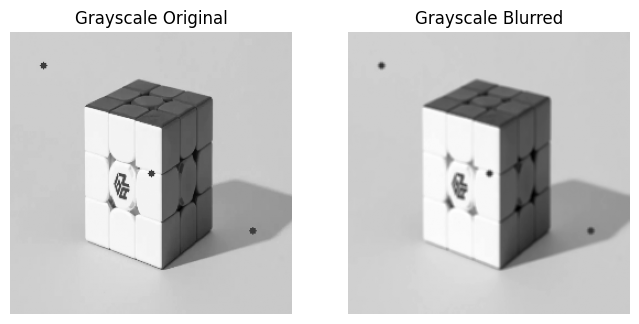

In [10]:
kernel_blur = np.ones((3,3), np.float32) / 9
blur = cv2.filter2D(img, -1, kernel_blur)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)

print(gray[90:95, 90:95])
print(gray_blur[90:95, 90:95])
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_blur, cmap='gray')
plt.title("Grayscale Blurred")
plt.axis('off')

plt.show()


Task 6. Sharpen

[[251 238 240 237 239]
 [251 238 236 240 238]
 [251 238 240 238 237]
 [253 238 239 238 239]
 [252 238 237 238 238]]


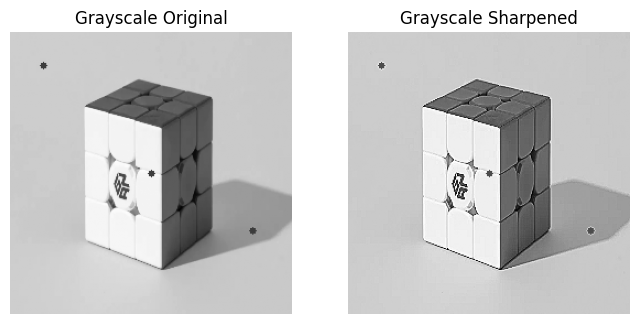

In [7]:
kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharp = cv2.filter2D(img, -1, kernel_sharp)
gray_sharp = cv2.cvtColor(sharp, cv2.COLOR_RGB2GRAY)

print(gray_sharp[90:95, 90:95])

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_sharp, cmap='gray')
plt.title("Grayscale Sharpened")
plt.axis('off')

plt.show()


Task 7. Convolution from scratch

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

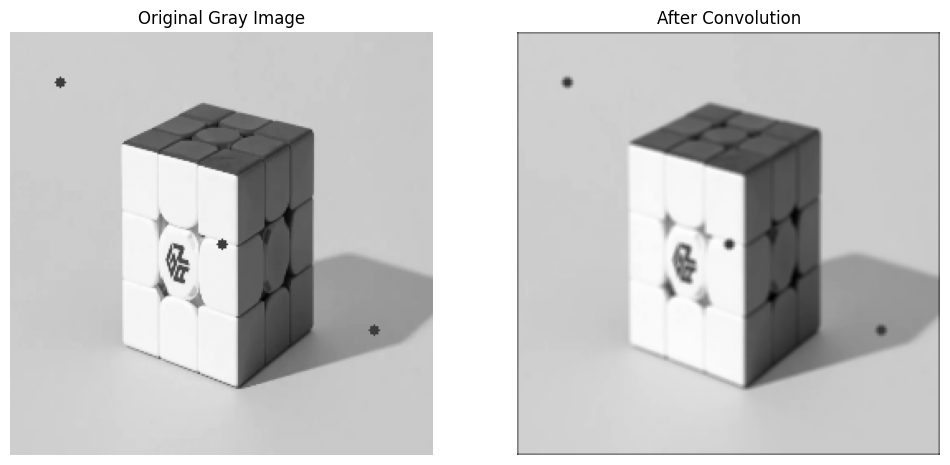

In [11]:
def conv2d(img, kernel):
    pad = kernel.shape[0] // 2
    padded = np.pad(img, pad)
    out = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+3, j:j+3]
            out[i,j] = np.sum(region * kernel)
    return out

manual = conv2d(gray, kernel_blur)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(manual, cmap='gray')
plt.title("After Convolution")
plt.axis('off')


Task 8. Maxpooling

[[235 239 239 239]
 [235 239 239 238]
 [235 239 239 238]
 [235 239 239 238]]
[[239. 239.]
 [239. 239.]]


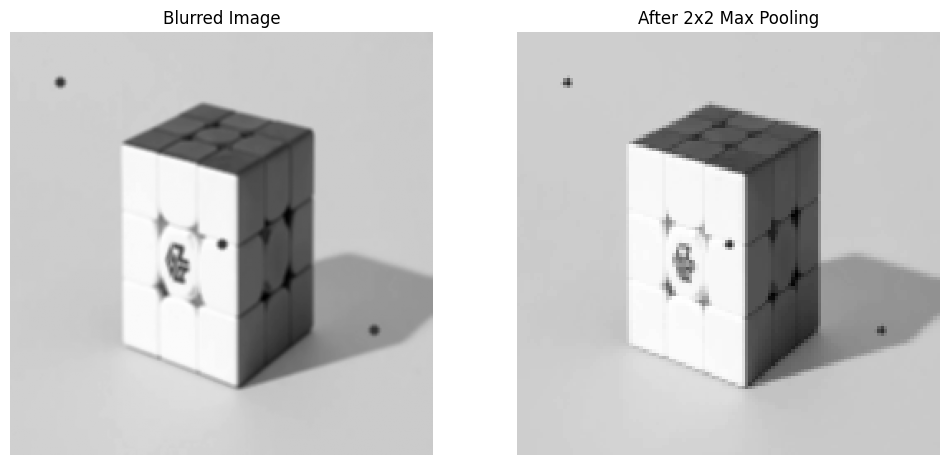

In [12]:
h, w = gray_blur.shape
pooled = np.zeros((h//2, w//2))

for i in range(0, h, 2):
    for j in range(0, w, 2):
        pooled[i//2, j//2] = np.max(gray_blur[i:i+2, j:j+2])

print(gray_blur[90:94, 90:94])
print(pooled[45:47, 45:47])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(gray_blur, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(pooled, cmap='gray')
plt.title("After 2x2 Max Pooling")
plt.axis('off')

plt.show()